In [1]:
# This is an EDA (Exploratory Data Analysis) on a datasets from Stutern.ng on 
# Nigerian graduates. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
#read data
data = pd.read_csv('nigerian-graduates.csv')

In [4]:
#show first 5 rows
data.head()

,Timestamp,What is your gender,Year of graduation,Title of course studied,Polytechnic/University attended,What is your highest level of education?,What best describes your current status?,How many jobs have you had since graduation including your current one?,Have you completed your NYSC?,"If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?",...,What currency are you currently paid in?,Approximately how many hours a day do you currently work?,"As far as you are aware, what was most important to your current employer about your qualification?",How do you find out about your job(s)?,"Thinking about your current employment, did you work for your employer before or during your higher education study?",Which form of transport do you use the most?,Were you able to rent an apartment or buy a car from the salary you got from your first job?,My course of study prepared me well for employment,My course of study prepared me well for further studies,Which of these skills/knowledge did your higher education prepare you for?
0,2/8/2018 9:05:23,Male,2013,Electrical & Electronic Engineering,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),3,NaN,NaN,...,Naira,8.0,No one thing was important,Internship,No,Bus,Yes: From my first job,No,No,"Critical thinking skills, Ability to solve com..."
1,2/15/2018 12:11:32,Male,2014,Psychology,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),2,Yes,2017.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,Internship,No,BRT,No: From my current job,Strongly Disagree,Agree,"Critical thinking skills, Ability to solve com..."
2,2/15/2018 13:47:10,Female,2013,Economics,"Bells University of Technology, Otta",Bachelor's degree,Working full time (paid employment),2,Yes,NaN,...,Naira,14.0,The subject(s) I studied,Employer's website,No,Uber/Taxify/Taxi services,No: From my current job,Disagree,Agree,"Ability to work with others, Written communica..."
3,2/16/2018 13:01:34,Male,2017,Mass Communication (Communication and Language...,"Bowen University, Iwo",Master's degree,Self-employed/freelance/entrepreneur,0,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/16/2018 13:18:03,Female,2013,Statistics,Ekiti State University,Bachelor's degree,Working full time (paid employment),3,Yes,2016.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Agree,Agree,Critical thinking skills


In [5]:
data.describe() #would only describe continuous variables

,Year of graduation,How many jobs have you had since graduation including your current one?,"If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?",Approximately how many hours a day do you currently work?
count,5219.000000,5219.000000,4278.000000,3432.000000
mean,2015.329182,1.136999,2016.579009,8.983683
std,1.305153,1.140146,1.354837,2.636293
min,2013.000000,0.000000,2013.000000,0.000000
25%,2014.000000,0.000000,2016.000000,8.000000
50%,2015.000000,1.000000,2017.000000,9.000000
75%,2016.000000,2.000000,2017.000000,10.000000
max,2017.000000,10.000000,2019.000000,24.000000


In [6]:
#rows and columns
data.shape

(5219, 36)

In [7]:
#let's take a look at the columns
data.columns

Index(['Timestamp', 'What is your gender', 'Year of graduation',
       'Title of course studied', 'Polytechnic/University attended',
       'What is your highest level of education?',
       'What best describes your current status?',
       'How many jobs have you had since graduation including your current one?',
       'Have you completed your NYSC?',
       'If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?',
       'Did you get your first full time job through your NYSC placement?',
       'Thinking about your first employment after graduation, what was your job level?',
       'What is/was your job role?',
       'What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication)',
       'Still thinking about your first employment, what is/was your monthly income level?',
       'Did you need your higher education qualification to get your first job (the actual qualification, not the subject of study)?

In [8]:
#column names are too long. let's rename columns
#create new columns
new_columns = ['created_at', 'gender', 'graduated', 'course', 'school', 'education_level', 'current_status',
              'jobs_after_graduation_plus_current', 'completed_nysc', 'completed_nysc_year', 'first_job_through_nysc',
              'first_job_level', 'first_job_role', 'first_job_company_sector', 'first_monthly_income', 'needed_qualification_for_first_job',
              'first_job_reason', 'current_job_level', 'current_job_role', 'current_company_sector', 'current_monthly_income',
              'needed_qualification_for_current_job', 'current_job_reason', 'best_company_for_graduates',
              'why_company_best_for_graduates', 'best_sector_to_work', 'currency_paid_with', 'hours_worked_per_day',
              'most_important_to_current_employer', 'job_source', 'worked_for_current_employer_during_school',
              'transport_form_used', 'get_car_or_apartment_from_first_job', 'studied_course_prepared_employment',
              'studied_course_prepared_further_studies', 'skills_school_prepared_gradutae']

In [9]:
#rename columns 
data.columns = new_columns

In [10]:
#drop created_at column 
data.drop('created_at', axis=1, inplace=True)

In [11]:
#check if the rows count are same across all columns
data.count() 
#some columns are missing values

gender                                       5219
graduated                                    5219
course                                       5219
school                                       5219
education_level                              5219
current_status                               5219
jobs_after_graduation_plus_current           5219
completed_nysc                               5218
completed_nysc_year                          4278
first_job_through_nysc                       5218
first_job_level                              1656
first_job_role                               1654
first_job_company_sector                     1656
first_monthly_income                         1656
needed_qualification_for_first_job           1656
first_job_reason                             1656
current_job_level                            3432
current_job_role                             3431
current_company_sector                       3432
current_monthly_income                       3432


In [12]:
#check columns with mising values
null_columns = data.columns[data.isnull().any()]
null_columns

Index(['completed_nysc', 'completed_nysc_year', 'first_job_through_nysc',
       'first_job_level', 'first_job_role', 'first_job_company_sector',
       'first_monthly_income', 'needed_qualification_for_first_job',
       'first_job_reason', 'current_job_level', 'current_job_role',
       'current_company_sector', 'current_monthly_income',
       'needed_qualification_for_current_job', 'current_job_reason',
       'best_company_for_graduates', 'why_company_best_for_graduates',
       'best_sector_to_work', 'currency_paid_with', 'hours_worked_per_day',
       'most_important_to_current_employer', 'job_source',
       'worked_for_current_employer_during_school', 'transport_form_used',
       'get_car_or_apartment_from_first_job',
       'studied_course_prepared_employment',
       'studied_course_prepared_further_studies',
       'skills_school_prepared_gradutae'],
      dtype='object')

In [13]:
#do a count of the null values on these columns
data[null_columns].isnull().sum()
#we have got a lot of null values on our hands

completed_nysc                                  1
completed_nysc_year                           941
first_job_through_nysc                          1
first_job_level                              3563
first_job_role                               3565
first_job_company_sector                     3563
first_monthly_income                         3563
needed_qualification_for_first_job           3563
first_job_reason                             3563
current_job_level                            1787
current_job_role                             1788
current_company_sector                       1787
current_monthly_income                       1787
needed_qualification_for_current_job         1788
current_job_reason                           1787
best_company_for_graduates                   2261
why_company_best_for_graduates               2110
best_sector_to_work                          1922
currency_paid_with                           1787
hours_worked_per_day                         1787


In [14]:
#lets look at these columns individually

In [15]:
#drop rows where completed_nysc is missing since its just one row
data.dropna(subset=['completed_nysc'], inplace=True)

In [16]:
#let's columns with missing values
null_columns = data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

completed_nysc_year                           940
first_job_level                              3563
first_job_role                               3564
first_job_company_sector                     3563
first_monthly_income                         3563
needed_qualification_for_first_job           3563
first_job_reason                             3563
current_job_level                            1787
current_job_role                             1787
current_company_sector                       1787
current_monthly_income                       1787
needed_qualification_for_current_job         1787
current_job_reason                           1787
best_company_for_graduates                   2261
why_company_best_for_graduates               2109
best_sector_to_work                          1922
currency_paid_with                           1787
hours_worked_per_day                         1787
most_important_to_current_employer           1787
job_source                                   1787


In [17]:
#lets take a look at the completed_nysc_year column
data['completed_nysc_year'].value_counts(dropna=False)

 2017.0    1513
NaN         940
 2018.0     832
 2016.0     790
 2015.0     541
 2014.0     303
 2019.0     224
 2013.0      75
Name: completed_nysc_year, dtype: int64

In [18]:
#lets look at the completed_nysc column
data['completed_nysc'].value_counts(dropna=False)

Yes        3418
No         1023
Ongoing     777
Name: completed_nysc, dtype: int64

In [19]:
#The 'completed nysc' ought be to either 'yes' or 'no'. Its either you have completed or not completed
#NYSC. Firstly, we gonna replace 'Ongoing' with 'No'

In [20]:
#Replace 'Ongoing' with 'No'
def replaceOngoingWithNo(data):
    for i in data.index:
        if data.at[i, 'completed_nysc'] == 'Ongoing':
            data.at[i, 'completed_nysc'] = 'No'
            
replaceOngoingWithNo(data)

In [21]:
#Just to confirm
data['completed_nysc'].value_counts(dropna=False)

Yes    3418
No     1800
Name: completed_nysc, dtype: int64

In [22]:
#I am gonna assume that null values on 'completed_nysc_year' is perhaps, due to some graduates yet
#to finish their NYSC. I am gonna replace 'completed_nysc_year' null values with 0 where 'completed_nysc' is no

In [23]:
def replaceNyscYear(data) :
    for i in data.index:
        cn = data.at[i, 'completed_nysc']
        if cn == 'No':
            data.at[i, 'completed_nysc_year'] = 0
            
replaceNyscYear(data)  

In [24]:
#lets see if 'completed_nysc_year' still has missing values
data['completed_nysc_year'].value_counts(dropna=False)

 0.0       1800
 2017.0    1481
 2016.0     768
 2015.0     515
 2014.0     285
NaN         167
 2018.0     126
 2013.0      73
 2019.0       3
Name: completed_nysc_year, dtype: int64

In [25]:
#We have about 167 rows with missing values on the this column. 
#Let's see if there are instance were 'completed_nysc' equals yes and 'completed_nysc_year' is null. If there is 
#then it is wrong, we gonna have to predict 'completed_nysc_year' based on the year the person graduated.
#we gonna add a year to the year graduated. NYSC lasts for a year and in most cases, done immediately
#after graduation

In [26]:
data.loc[(data['completed_nysc_year'].isnull()) & (data['completed_nysc'] == 'Yes')]

,gender,graduated,course,school,education_level,current_status,jobs_after_graduation_plus_current,completed_nysc,completed_nysc_year,first_job_through_nysc,...,currency_paid_with,hours_worked_per_day,most_important_to_current_employer,job_source,worked_for_current_employer_during_school,transport_form_used,get_car_or_apartment_from_first_job,studied_course_prepared_employment,studied_course_prepared_further_studies,skills_school_prepared_gradutae
2,Female,2013,Economics,"Bells University of Technology, Otta",Bachelor's degree,Working full time (paid employment),2,Yes,NaN,No,...,Naira,14.0,The subject(s) I studied,Employer's website,No,Uber/Taxify/Taxi services,No: From my current job,Disagree,Agree,"Ability to work with others, Written communica..."
3,Male,2017,Mass Communication (Communication and Language...,"Bowen University, Iwo",Master's degree,Self-employed/freelance/entrepreneur,0,Yes,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,Male,2013,Mass Communication (Communication and Language...,University of Lagos,Master's degree,Working full time (paid employment),2,Yes,NaN,No,...,Naira,10.0,The level of study,"Personal contacts, including family and friends",No,Keke Marwa/Napep/Tricycle,No: From my current job,Strongly Agree,Strongly Agree,"Critical thinking skills, Ability to solve com..."
102,Male,2013,Computer Science,University of Uyo,Master's degree,Self-employed/freelance/entrepreneur,3,Yes,NaN,No,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,Media (e.g. newspaper/magazine advertisement),Yes: during my higher education study,Car,Yes: From my first job,Agree,Agree,"Critical thinking skills, Ability to solve com..."
111,Female,2016,Education And Biology,University of Lagos,Bachelor's degree,Unemployed,0,Yes,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,Male,2016,Physics and Astronomy,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),2,Yes,NaN,No,...,Naira,8.0,My Previous work experience and achievements,Social media/professional networking sites,No,Car,Yes: From my first job,Agree,Agree,"Critical thinking skills, Ability to solve com..."
127,Prefer not to say,2013,Architecture,"Abubakar Tafawa Balewa University, Bauchi",Bachelor's degree,Self-employed/freelance/entrepreneur,2,Yes,NaN,No,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,Media (e.g. newspaper/magazine advertisement),Yes: before my higher education,Commercial Vehicles,No,Strongly Agree,Strongly Agree,Critical thinking skills
128,Female,2013,Microbiology,University of Calabar,Bachelor's degree,Working full time (paid employment),1,Yes,NaN,No,...,Naira,9.0,Don't know,Employer's website,No,Commercial Vehicles,No,Agree,Strongly Agree,"Critical thinking skills, Ability to solve com..."
133,Male,2014,Mechanical Engineering,"The Polytechnic Ibadan, Ibadab, Oyo State.",Higher National Diploma (HND),Unemployed,0,Yes,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,Male,2013,Marketing,"Nnamdi Azikiwe University, Awka",Bachelor's degree,Unemployed,2,Yes,NaN,No,...,Naira,12.0,The subject(s) I studied,Media (e.g. newspaper/magazine advertisement),No,Commercial Vehicles,No,Strongly Agree,Strongly Agree,"Critical thinking skills, Ability to solve com..."


In [27]:
#We have got some values so we are gonna 'predict' the 'completed_nysc_year' based on 'graduated'
def getNyscCompletedYear(data):
    for i in data.index:
        if(np.isnan(data.at[i, 'completed_nysc_year'])) & (data.at[i, 'completed_nysc'] == 'Yes'):
            data.at[i, 'completed_nysc_year'] = data.at[i, 'graduated'] + 1
            
getNyscCompletedYear(data)

In [28]:
#lets confirm 
data.loc[(data['completed_nysc_year'].isnull()) & (data['completed_nysc'] == 'Yes')]

,gender,graduated,course,school,education_level,current_status,jobs_after_graduation_plus_current,completed_nysc,completed_nysc_year,first_job_through_nysc,...,currency_paid_with,hours_worked_per_day,most_important_to_current_employer,job_source,worked_for_current_employer_during_school,transport_form_used,get_car_or_apartment_from_first_job,studied_course_prepared_employment,studied_course_prepared_further_studies,skills_school_prepared_gradutae


In [29]:
#Ok. We are good. Let's see if we still have null values in 'completed_nysc_year'
data['completed_nysc_year'].value_counts(dropna=False)
#no more null values

0.0       1800
2017.0    1508
2016.0     828
2015.0     548
2014.0     322
2018.0     136
2013.0      73
2019.0       3
Name: completed_nysc_year, dtype: int64

In [30]:
#let's see columns with missing values still
null_columns = data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

first_job_level                              3563
first_job_role                               3564
first_job_company_sector                     3563
first_monthly_income                         3563
needed_qualification_for_first_job           3563
first_job_reason                             3563
current_job_level                            1787
current_job_role                             1787
current_company_sector                       1787
current_monthly_income                       1787
needed_qualification_for_current_job         1787
current_job_reason                           1787
best_company_for_graduates                   2261
why_company_best_for_graduates               2109
best_sector_to_work                          1922
currency_paid_with                           1787
hours_worked_per_day                         1787
most_important_to_current_employer           1787
job_source                                   1787
worked_for_current_employer_during_school    1787


In [31]:
#Look at the above, from 'first_job_level' to 'first_job_reason', there is an equal number of missing values
# (except 'first_job_role') across these columns. An answer(s) to question(a) might have caused this.
#Also, there is a pattern from current_job_level to current_job_reason. This same pattern exists from
#'currency_paid_with' to 'skills_school_prepared_gradutae'. I am assuming these graduates have no jobs currently
#It is also possible that some graduates have never worked so we are gonna have null values in both
#'current job' and 'first job' columns

In [32]:
#We are gonna assume columns related to current jobs that are null is because the graduates 
#were unemployed at that point in time. We are going to do some replacing.

def adjustCurrentStatus(data):
    for i in data.index:
        if pd.isnull(data.at[i, 'current_job_level']): #'current_job_level' works for other 'current jobs' related columns
            data.at[i, 'current_job_level'] = 'Unemployed'
            data.at[i, 'current_job_role'] = 'Unemployed'
            data.at[i, 'current_company_sector'] = 'Unemployed'
            data.at[i, 'current_monthly_income'] = 'No Income'
            data.at[i, 'needed_qualification_for_current_job'] = 'Unemployed'
            data.at[i, 'current_job_reason'] = 'Unemployed'
            data.at[i, 'best_company_for_graduates'] = 'No Opinion'
            data.at[i, 'why_company_best_for_graduates'] = 'No Opinion'
            data.at[i, 'best_sector_to_work'] = 'No Opinion'
            data.at[i, 'currency_paid_with'] = 'Unemployed'
            data.at[i, 'hours_worked_per_day'] = 0
            data.at[i, 'most_important_to_current_employer'] = 'No Opinion'
            data.at[i, 'job_source'] = 'No Opinion'
            data.at[i, 'worked_for_current_employer_during_school'] = 'No Opinion'
            data.at[i, 'transport_form_used'] = 'Unemployed'
            data.at[i, 'get_car_or_apartment_from_first_job'] = 'Unemployed'
            data.at[i, 'studied_course_prepared_employment'] = 'Unemployed'
            data.at[i, 'studied_course_prepared_further_studies'] = 'Unemployed'
            data.at[i, 'skills_school_prepared_gradutae'] = 'Unemployed'
            
adjustCurrentStatus(data)

In [33]:
#lets check remaining missing values
null_columns = data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

first_job_level                       3563
first_job_role                        3564
first_job_company_sector              3563
first_monthly_income                  3563
needed_qualification_for_first_job    3563
first_job_reason                      3563
best_company_for_graduates             474
why_company_best_for_graduates         322
best_sector_to_work                    135
dtype: int64

In [43]:
#More assumptions, it is possible that a graduate may have never worked so he/she might have a first job. 
#This may explain why we have similar null rows across the 'first job' column. I am gonna replace
#these null values if the 'first_job_level' is 'Unemployed' and 'jobs_after_graduation_plus_current' is 0

def adjustFirstJobs(data):
    for i in data.index:
        if (data.at[i, 'jobs_after_graduation_plus_current'] == completed_nysc0) & (pd.isnull(data.at[i, 'first_job_level'])):
            data.at[i, 'first_job_level'] = 'Unemployed'
            data.at[i, 'first_job_role'] = 'Unemployed'
            data.at[i, 'first_job_company_sector'] = 'Unemployed'
            data.at[i, 'first_monthly_income'] = 'No Income'
            data.at[i, 'needed_qualification_for_first_job'] = 'Unemployed'
            data.at[i, 'first_job_reason'] = 'No Opinion'
        
adjustFirstJobs(data)

In [46]:
#lets check remaining missing values
null_columns = data.columns[data.isnull().any()]
data[null_columns].isnull().sum()
#we still have null values and they follow a pattern (same number of null rows) especially the 
#'first job' columns

first_job_level                       1776
first_job_role                        1777
first_job_company_sector              1776
first_monthly_income                  1776
needed_qualification_for_first_job    1776
first_job_reason                      1776
best_company_for_graduates             474
why_company_best_for_graduates         322
best_sector_to_work                    135
dtype: int64

In [47]:
#let's look at these columns for any patterns
data2 = data.loc[data['first_job_role'].isnull()]
data2[data2.columns[4:15]]

,education_level,current_status,jobs_after_graduation_plus_current,completed_nysc,completed_nysc_year,first_job_through_nysc,first_job_level,first_job_role,first_job_company_sector,first_monthly_income,needed_qualification_for_first_job
1,Bachelor's degree,Working full time (paid employment),2,Yes,2017.0,No,Entry level,NaN,Media,"‎₦20,000 - ‎₦49,999",Yes: the qualification was a formal requirement
7,Bachelor's degree,Working full time (paid employment),1,Yes,2017.0,No,NaN,NaN,NaN,NaN,NaN
15,Bachelor's degree,Working full time (paid employment),1,Yes,2016.0,No,NaN,NaN,NaN,NaN,NaN
19,Bachelor's degree,Voluntary or other unpaid work or on an intern...,1,Yes,2017.0,No,NaN,NaN,NaN,NaN,NaN
20,Bachelor's degree,Working full time (paid employment),1,No,0.0,No,NaN,NaN,NaN,NaN,NaN
24,Bachelor's degree,"Engaged in full-time further study, training o...",1,Yes,2016.0,No,NaN,NaN,NaN,NaN,NaN
28,Bachelor's degree,Working full time (paid employment),1,No,0.0,No,NaN,NaN,NaN,NaN,NaN
32,Bachelor's degree,Youth Corper (NYSC),1,No,0.0,Yes,NaN,NaN,NaN,NaN,NaN
35,Bachelor's degree,Self-employed/freelance/entrepreneur,1,Yes,2015.0,No,NaN,NaN,NaN,NaN,NaN
37,Bachelor's degree,Working full time (paid employment),1,Yes,2017.0,No,NaN,NaN,NaN,NaN,NaN


In [50]:
#for some wierd reasons, these graduates answered filled nothing for their  despite claiming to have had at least
#one job. This is erraneous and can negatively impact our analysis. I am going drop rows where graduates have had
#at least a job but didn't fill any of the 'first jobs' columns

def dropNullFirstJobColumns(data):
    for i in data.index:
        if (data.at[i, 'jobs_after_graduation_plus_current'] >= 1) & (pd.isnull(data.at[i, 'first_job_role'])):
            data.drop([i], axis=0, inplace=True)

dropNullFirstJobColumns(data)  

In [52]:
#lets check remaining missing values
null_columns = data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

best_company_for_graduates        190
why_company_best_for_graduates    144
best_sector_to_work                62
dtype: int64

In [55]:
#It is possible we have null values on these columns because these graduates have no answers to the questions
#we are gonna drop them. 
data.dropna(subset=['best_company_for_graduates', 'why_company_best_for_graduates', 'best_sector_to_work'], inplace=True)

In [57]:
#we are good now. We now have 3194 rows and 35 columns. 
data.shape

(3194, 35)

In [58]:
#univariate analysis for categorical data

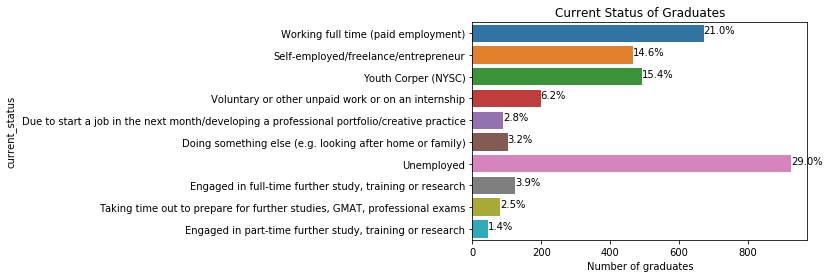

In [60]:
#Current status of the graduates
ax = sns.countplot(y="current_status", data=data)
plt.title('Current Status of Graduates')
plt.xlabel('Number of graduates')

total = len(data['current_status'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

#Majority (about 35%) of graduates are employed. Less than 29% are idle. 

In [62]:
#school distribution. I have limited the rows to 10. 
data['school'].value_counts().nlargest(10)
#Bulk of correspondents graduated from Covenant university and the University of Lagos.

University of Lagos                                   293
Covenant University Ota                               257
Obafemi Awolowo University,Ile-Ife                    199
University of Nigeria, Nsukka                         141
University of Ibadan                                  137
Babcock University,Ilishan-Remo                       122
University of Benin                                   113
University of Ilorin                                  107
University of Agriculture, Abeokuta.                   82
Ladoke Akintola University of Technology, Ogbomoso     79
Name: school, dtype: int64

In [63]:
#course distribution
data['course'].value_counts().nlargest(10)
#Most correspondents studied Computer science. 

Computer Science                                        257
Accountancy                                             212
Economics                                               193
Electrical & Electronic Engineering                     136
Mass Communication (Communication and Language Arts)    122
Biochemistry                                            113
Business Administration                                 112
Microbiology                                            102
Mechanical Engineering                                   94
English and Literary Studies                             86
Name: course, dtype: int64

Text(0.5, 1.0, 'Needed qualification for first job')

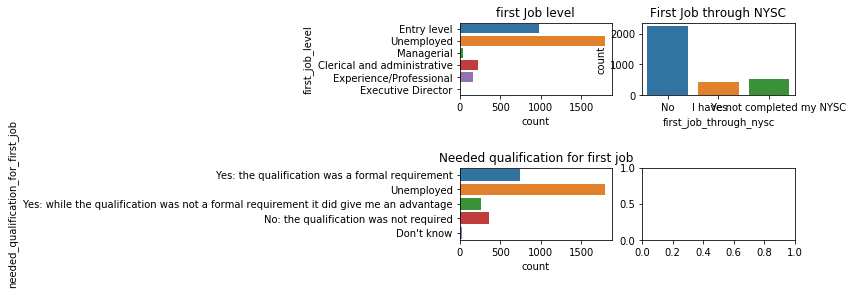

In [64]:
fig, ax = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 1)
sns.countplot(y='first_job_level', data=data, ax=ax[0, 0]).set_title('first Job level')
sns.countplot(x='first_job_through_nysc', data=data, ax=ax[0, 1]).set_title('First Job through NYSC')
sns.countplot(y='needed_qualification_for_first_job', data=data, ax=ax[1, 0]).set_title('Needed qualification for first job')
#Most graduates start out as entry level staff
#only about 20% get their first jobs via NYSC
#Companies heavily require graduates to posses some sort of qualification

In [67]:
data.loc[data['first_job_role'] != 'Unemployed']['first_job_role'].value_counts().nlargest(10)
#Teaching and customer service provided more jobs for fresh graduates.  

Customer Service                                     173
Teacher                                              172
Finance/Accounting                                   108
Sales                                                 92
IT Support                                            64
Content Creator/Content Writer/ Content Developer     62
Marketing                                             59
Data Entry                                            47
Doctor, Nursing And Other Medical Related Roles       44
Executive Assistance/Personal Assitance               44
Name: first_job_role, dtype: int64

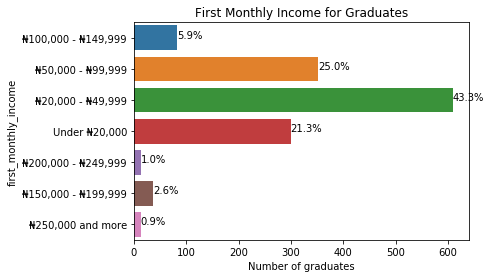

In [74]:
yy = data.loc[data['first_monthly_income'] != 'No Income']['first_monthly_income'] #format series
ax = sns.countplot(y=yy, data=data)
plt.title('First Monthly Income for Graduates')
plt.xlabel('Number of graduates')

total = len(yy)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
#Approximately 90% of graduates earn than 100k on their first job. Only 1.9% earn more than 200k

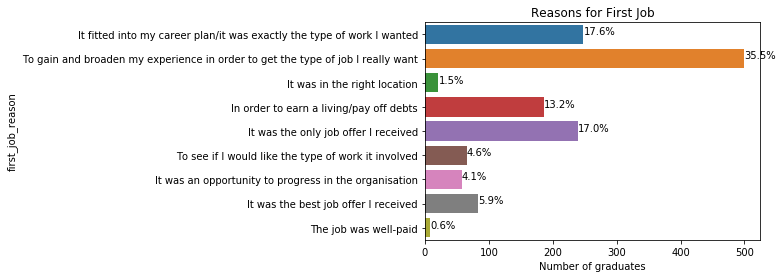

In [76]:
#Reasons for graduates' first job 
yy = data.loc[data['first_job_reason'] != 'No Opinion']['first_job_reason'] #format series
ax = sns.countplot(y=yy, data=data)
plt.title('Reasons for First Job')
plt.xlabel('Number of graduates')

total = len(yy)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
#About 70% take their first-time jobs just to eke out a living
#Less than 1% of graduates get well-paying first-time jobs (200k and above). 
#Only 17% get their desired jobs. 

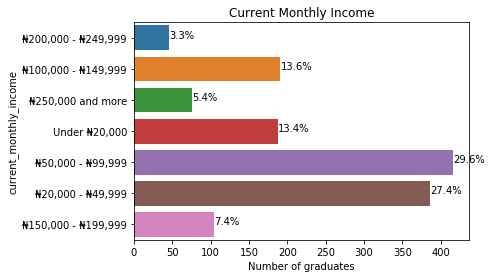

In [79]:
#current monthly income
yy = data.loc[data['current_monthly_income'] != 'No Income']['current_monthly_income'] #format series
ax = sns.countplot(y=yy, data=data)
plt.title('Current Monthly Income')
plt.xlabel('Number of graduates')

total = len(yy)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
#As at 2018, about 8% of graduates earn more than 200k. 70.4% earn less than 100k. 

In [82]:
yy = data.loc[data['current_job_reason'] != 'Unemployed']['current_job_reason'] #format series
yy.value_counts(normalize=True).nlargest(10) * 100
#As at 2018, Only 28% get the job they wanted. Around 45% take up their current jobs to eke out a living. 

It fitted into my career plan/it was exactly the type of work I wanted             28.002843
To gain and broaden my experience in order to get the type of job I really want    27.647477
In order to earn a living/pay off debts                                             9.665956
It was the only job offer I received                                                9.594883
It was the best job offer I received                                                9.026297
It was an opportunity to progress in the organisation                               6.396588
To see if I would like the type of work it involved                                 3.127221
The job was well-paid                                                               1.350391
It was in the right location                                                        1.279318
Self Employed. Because i have no paid Job                                           0.142146
Name: current_job_reason, dtype: float64

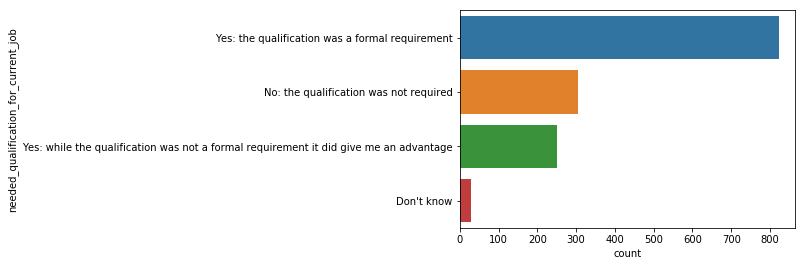

In [85]:
yy = data.loc[data['needed_qualification_for_current_job'] != 'Unemployed']['needed_qualification_for_current_job'] #format series
sns.countplot(y = yy, data=data)
#As at 2018, qualifications were a major requirement for employment. 

In [89]:
# best_company_for_graduates
yy = data.loc[data['best_company_for_graduates'] != 'No Opinion']['best_company_for_graduates'] #format series
yy.value_counts(normalize=True).nlargest(10)*100
#The top 5 companies to work for - Andela, KPMG, Shell, Google and Chevron. 

Andela            3.482587
KPMG              2.487562
Banks             1.279318
Shell             1.208244
Multinationals    1.066098
Chevron           1.066098
Banking           0.923952
Oil and gas       0.923952
Google            0.923952
Government        0.852878
Name: best_company_for_graduates, dtype: float64

In [92]:
yy = data.loc[data['why_company_best_for_graduates'] != 'No Opinion']['why_company_best_for_graduates'] #format series
yy.value_counts().nlargest(5)
#Graduates choose their 'best companies to work for' based on reviews in previous/current contact with the company

Impression formed from talking to people who have worked there or still work there    709
Impression formed during any encounter with company representatives                   260
Impression formed from the media                                                      191
Others                                                                                165
Daily growth in IT                                                                      1
Name: why_company_best_for_graduates, dtype: int64

In [94]:
yy = data.loc[data['best_sector_to_work'] != 'No Opinion']['best_sector_to_work'] #format series
yy.value_counts().nlargest(5)
#Oil/Gas and Technology sectors are the best sectors to work for.

Oil & Gas / Mining              189
Technology                      153
Banking / Financial Services    120
Consulting                       93
Engineering                      72
Name: best_sector_to_work, dtype: int64

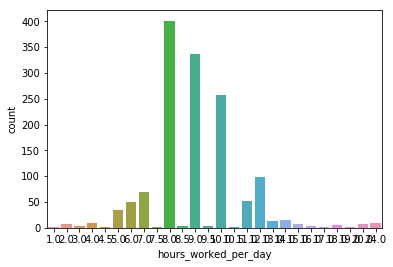

In [98]:
yy = data.loc[data['hours_worked_per_day'] != 0]['hours_worked_per_day'] #format series
sns.countplot(yy, data=data)
#Most graduates work between 8 - 10hrs/day

In [100]:
yy = data.loc[data['most_important_to_current_employer'] != 'No Opinion']['most_important_to_current_employer'] #format series
yy.value_counts(normalize=True).nlargest(10)*100
#educational qualifications is very important for employers. Less than 1% of employers see experience
#as an important qualification

The level of study                                              23.454158
The subject(s) I studied                                        19.758351
IT/SIWES/Internship experience (gained as part of my course)    17.270789
No one thing was important                                      13.290689
Don't know                                                      10.945274
Experience                                                       0.355366
The grade I graduated with                                       0.142146
Experience                                                       0.142146
Ability to learn on the job                                      0.142146
Previous work experience                                         0.142146
Name: most_important_to_current_employer, dtype: float64

In [102]:
yy = data.loc[data['job_source'] != 'No Opinion']['job_source'] #format series
yy.value_counts(normalize=True)*100
#61% of jobs are gotten via networking. 

Personal contacts, including family and friends                     40.724947
Social media/professional networking sites                          20.753376
Recruitment agency/Online job site                                  20.398010
Media (e.g. newspaper/magazine advertisement)                        7.675906
Internship                                                           4.264392
Employer's website                                                   3.340441
University/polytechnic (e.g. Careers Service, lecturer, website)     2.842928
Name: job_source, dtype: float64

Text(0.5, 1.0, 'Studied course vs further studies')

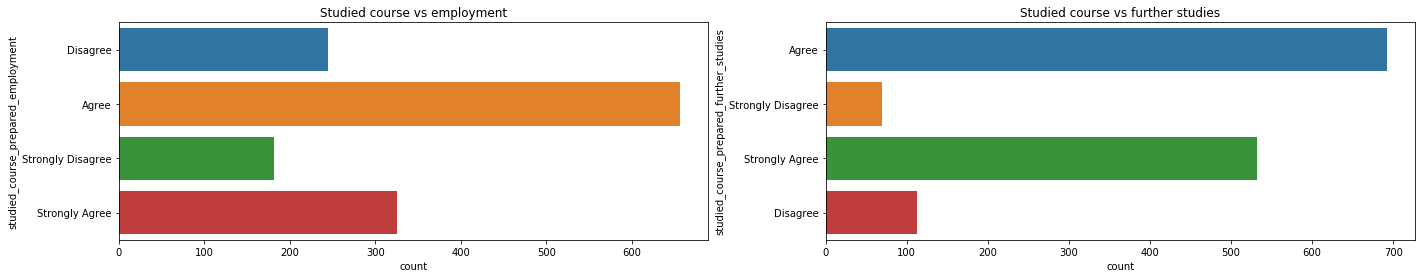

In [118]:
y1 = data.loc[data['studied_course_prepared_employment'] != 'Unemployed']['studied_course_prepared_employment'] #format series
y2 = data.loc[data['studied_course_prepared_further_studies'] != 'Unemployed']['studied_course_prepared_further_studies'] #format series
fig, ax = plt.subplots(1, 2)
plt.subplots_adjust(hspace = 1, left=2, right=5)
sns.countplot(y=y1, data=data, ax=ax[0]).set_title('Studied course vs employment')
sns.countplot(y=y2, data=data, ax=ax[1]).set_title('Studied course vs further studies')
#less than 35% believed that their course of study had no impact in their choice of jobs
#Course of study was only important for further studies 

In [107]:
yy = data.loc[data['skills_school_prepared_gradutae'] != 'Unemployed']['skills_school_prepared_gradutae'] #format series
yy.value_counts(normalize=True).nlargest(5)*100
#7% believed school never equipped them with any skills
#18% of graduates were equipped with essential skills needed to survive outside the 4 walls of school.

Critical thinking skills, Ability to solve complex problems, Ability to work with others, Written communication skills, Spoken communication skills, Knowledge of the skill(s) you are studying    17.910448
Critical thinking skills                                                                                                                                                                            7.320540
Ability to solve complex problems                                                                                                                                                                   7.036247
None of the above                                                                                                                                                                                   6.965174
Ability to work with others                                                                                                                                                         

In [108]:
#multi-variate analysis

Text(0.5, 1.0, 'First Income distribution across Gender')

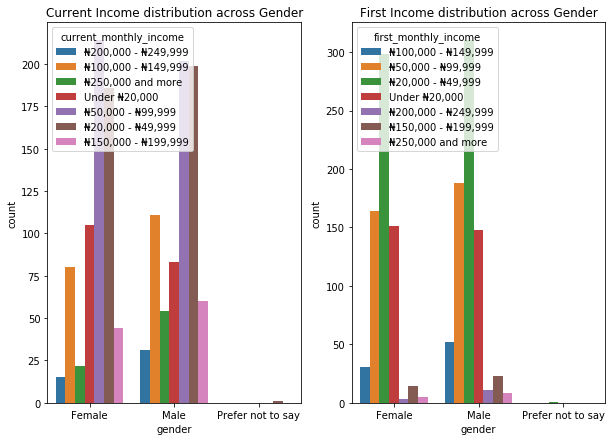

In [128]:
#Income distribution across gender
y1 = data.loc[data['current_monthly_income'] != 'No Income']['current_monthly_income'] #format series
x1 = data.loc[data['current_monthly_income'] != 'No Income']['gender'] #format series
y2 = data.loc[data['first_monthly_income'] != 'No Income']['first_monthly_income'] #format series
x2 = data.loc[data['first_monthly_income'] != 'No Income']['gender'] #format series
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(x=x1, hue=y1, data=data, ax=ax[0]).set_title('Current Income distribution across Gender')
sns.countplot(x=x2, hue=y2, data=data, ax=ax[1]).set_title('First Income distribution across Gender')

#Men are generally paid more than women. 

In [132]:
#Analysing graduates with high paying jobs (>=200k)
array = ['‎₦250,000 and more', '‎₦200,000 - ‎₦249,999']
new_df = data.loc[data['current_monthly_income'].isin(array)]
new_df = new_df[['current_monthly_income', 'school', 'current_company_sector', 'job_source']]
new_df['school'].value_counts().nlargest(3)
#High paying jobs (=>200k) are gotten by covenant university and university of lagos graduates

Covenant University Ota               31
University of Lagos                   11
Obafemi Awolowo University,Ile-Ife     8
Name: school, dtype: int64

/home/uche/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


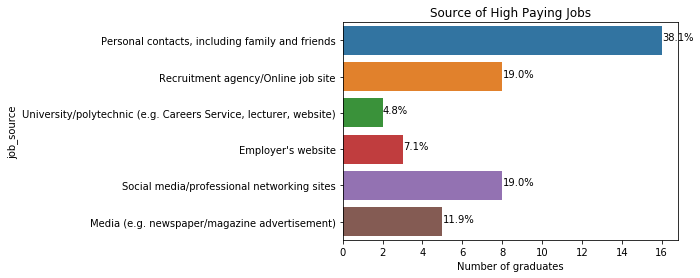

In [133]:
#So why do students of covenant and university of lagos get high paying jobs?
schools = ['Covenant University Ota', 'University of Lagos']
new_df2 = new_df[data['school'].isin(schools)]
new_df2['job_source'].value_counts()

ax = sns.countplot(y="job_source", data=new_df2)
plt.title('Source of High Paying Jobs')
plt.xlabel('Number of graduates')

total = len(new_df2['job_source'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
#Personal contacts are important in getting high-paying jobs